In [6]:
from joblib import dump, load 
import numpy as np
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.decomposition import PCA
import matplotlib.cm as cm
colors = cm.viridis(np.linspace(0, 1, 39))

In [2]:
ph_vecs = load('ph_vecs')
spk_vecs = load('spk_vecs')
spk_order = load('spk_order')
spk_ph_id = load('spk_ph_id')
spk_ph_vecs = load('spk_ph_vecs')

ph_pca = PCA(n_components=39)
ph_pca.fit(ph_vecs)
spk_pca = PCA(n_components=40)
spk_pca.fit(spk_vecs)
joint_pca = PCA(n_components=100)
joint_pca.fit(spk_ph_vecs)
projection = joint_pca.transform(spk_ph_vecs)

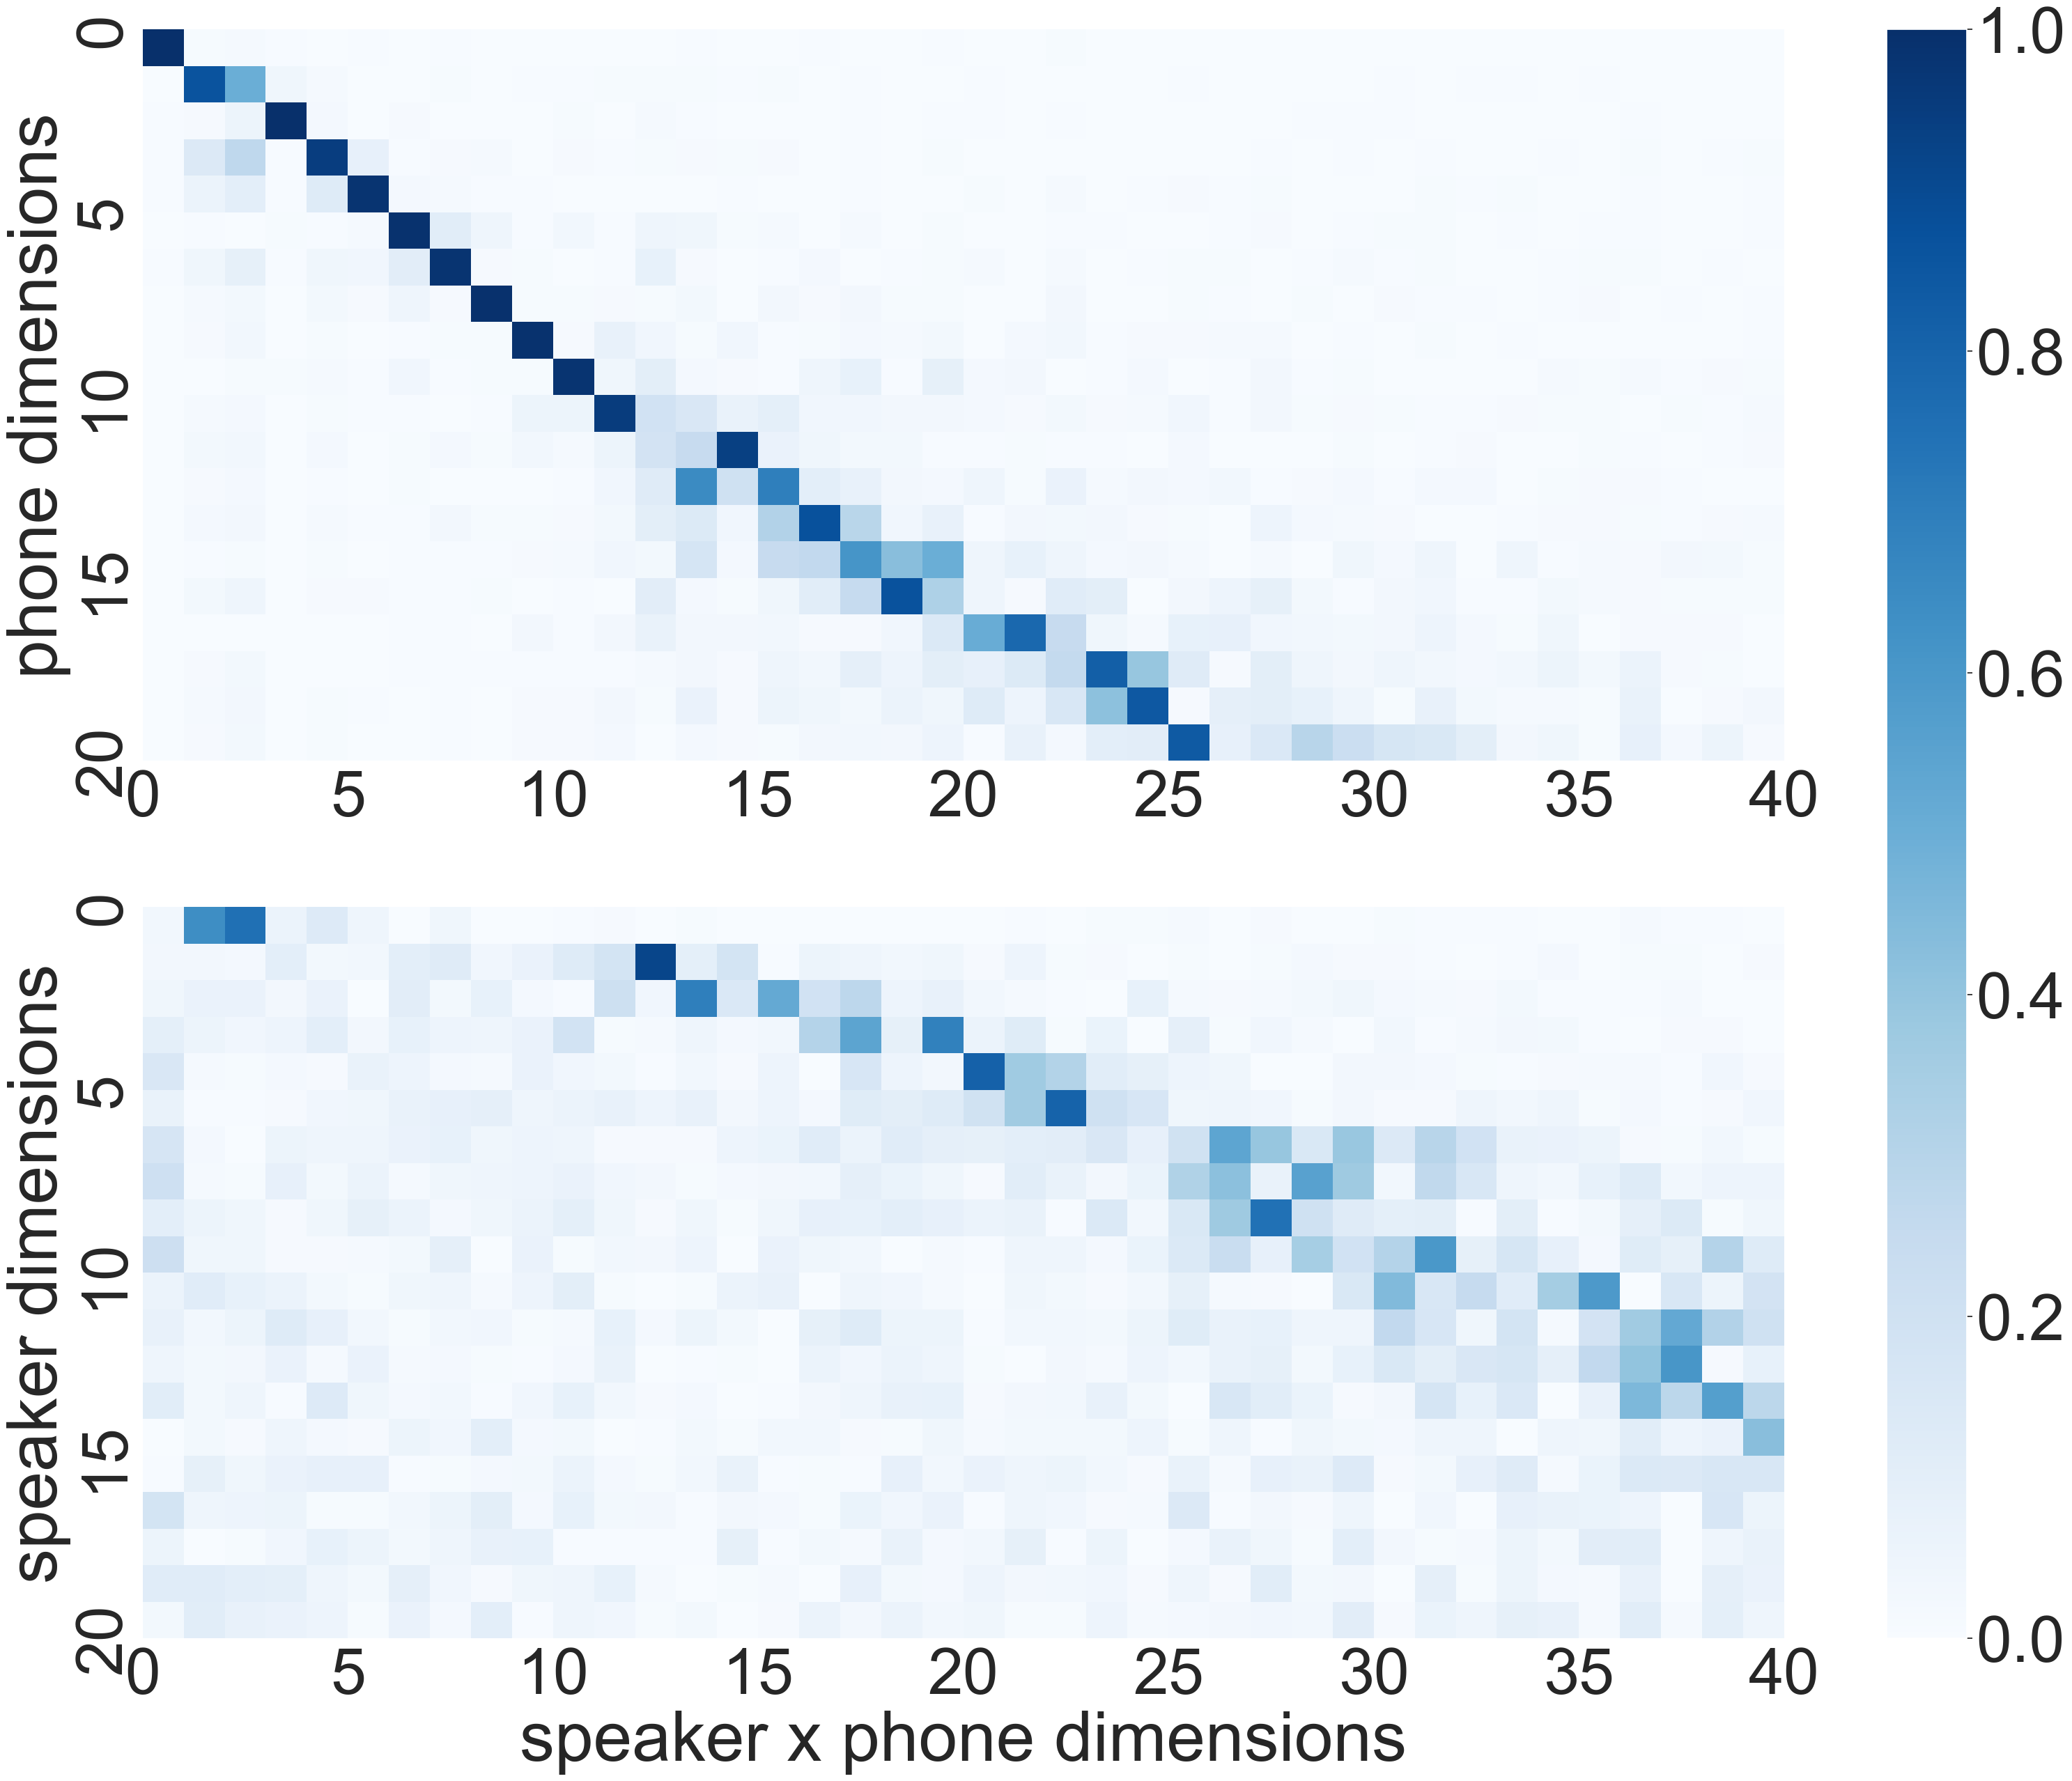

In [3]:
sm = plt.cm.ScalarMappable(cmap="Blues")
sns.set(font_scale=6) 
f, axes = plt.subplots(2,1, figsize=(38,30))
s=sns.heatmap(np.abs(np.dot(ph_pca.components_[:20], joint_pca.components_[:40].transpose())),vmin=0,vmax=1, cmap='Blues',cbar=False, ax=axes[0])
s.set_ylabel('phone dimensions')
yticks = [0,5,10,15,20]
xticks = np.linspace(0,40,9).astype(int)
s.set_xticks(xticks)
s.set_yticks(yticks)
s.set_xticklabels(xticks)
s.set_yticklabels(yticks)


s=sns.heatmap(np.abs(np.dot(spk_pca.components_[:20], joint_pca.components_[:40].transpose())),vmin=0,vmax=1, cmap='Blues',cbar=False, ax=axes[1])
s.set_ylabel('speaker dimensions')
s.set_xlabel('speaker x phone dimensions')
yticks = [0,5,10,15,20]
s.set_xticks(xticks)
s.set_yticks(yticks)
s.set_xticklabels(xticks)
s.set_yticklabels(yticks)
f.colorbar(sm, ax=axes.flatten(),orientation="vertical")
# fig_path = 'spk_ph_dimensions.png'
# plt.savefig(fig_path, dpi=300, bbox_inches='tight')

In [7]:
def scatter_plot(idx, ph_ordered):
    plot_ph_loc = defaultdict(list)
    plot_ph_id = defaultdict(list)
    for i, spk_ph in enumerate(spk_ph_id):
        spk, ph = re.match('(\d+)\-(.*)',spk_ph).group(1,2)
        plot_ph_loc[ph].append(projection[i,idx])
        plot_ph_id[ph].append(spk_order[i])
    x_loc = []
    y_loc = []
    for ph in ph_ordered:
        x_loc.append(plot_ph_id[ph])
        y_loc.append(plot_ph_loc[ph])
    return x_loc, y_loc

def phone_loc_ordering(projection, dim):
    # compute average phone loc
    ph_loc = defaultdict(list)
    for i, spk_ph in enumerate(spk_ph_id):
        spk, ph = re.match('(\d+)\-(.*)',spk_ph).group(1,2)
        ph_loc[ph].append(projection[i,dim])
    # rank
    ph_list = []
    avg_loc = []
    for ph, loc in ph_loc.items():
        ph_list.append(ph)
        avg_loc.append(np.mean(loc))
    return list(np.array(ph_list)[np.argsort(avg_loc)[::-1]])

def plot_projection_on_dimension(projection, idx):
    font = {
            'size'   : 50,

    }
    matplotlib.rc('font', **font)
    fig = plt.figure(figsize=(45,20))
    ax = plt.subplot(1,1,1)
    ph_ordered = phone_loc_ordering(projection, idx)
    ph2idx = {ph: idx for idx, ph in enumerate(ph_ordered)}
    x_loc, y_loc = scatter_plot(idx, ph_ordered)
    for i in range(39):
        ph = ph_ordered[i]
        plt.scatter(x_loc[i], y_loc[i], alpha=0.8, s=150, marker='o', color=colors[ph2idx[ph]], label=ph)
    plt.ylabel('projection on each dimension')
    plt.xlabel('speaker index')
    # plt.ylim([-1.3,1.6])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center',bbox_to_anchor=(0.5,0.96), prop={'weight':"bold", 'size': 35}, ncol=39, markerscale=0, handlelength=-2, labelcolor=colors, framealpha=0)

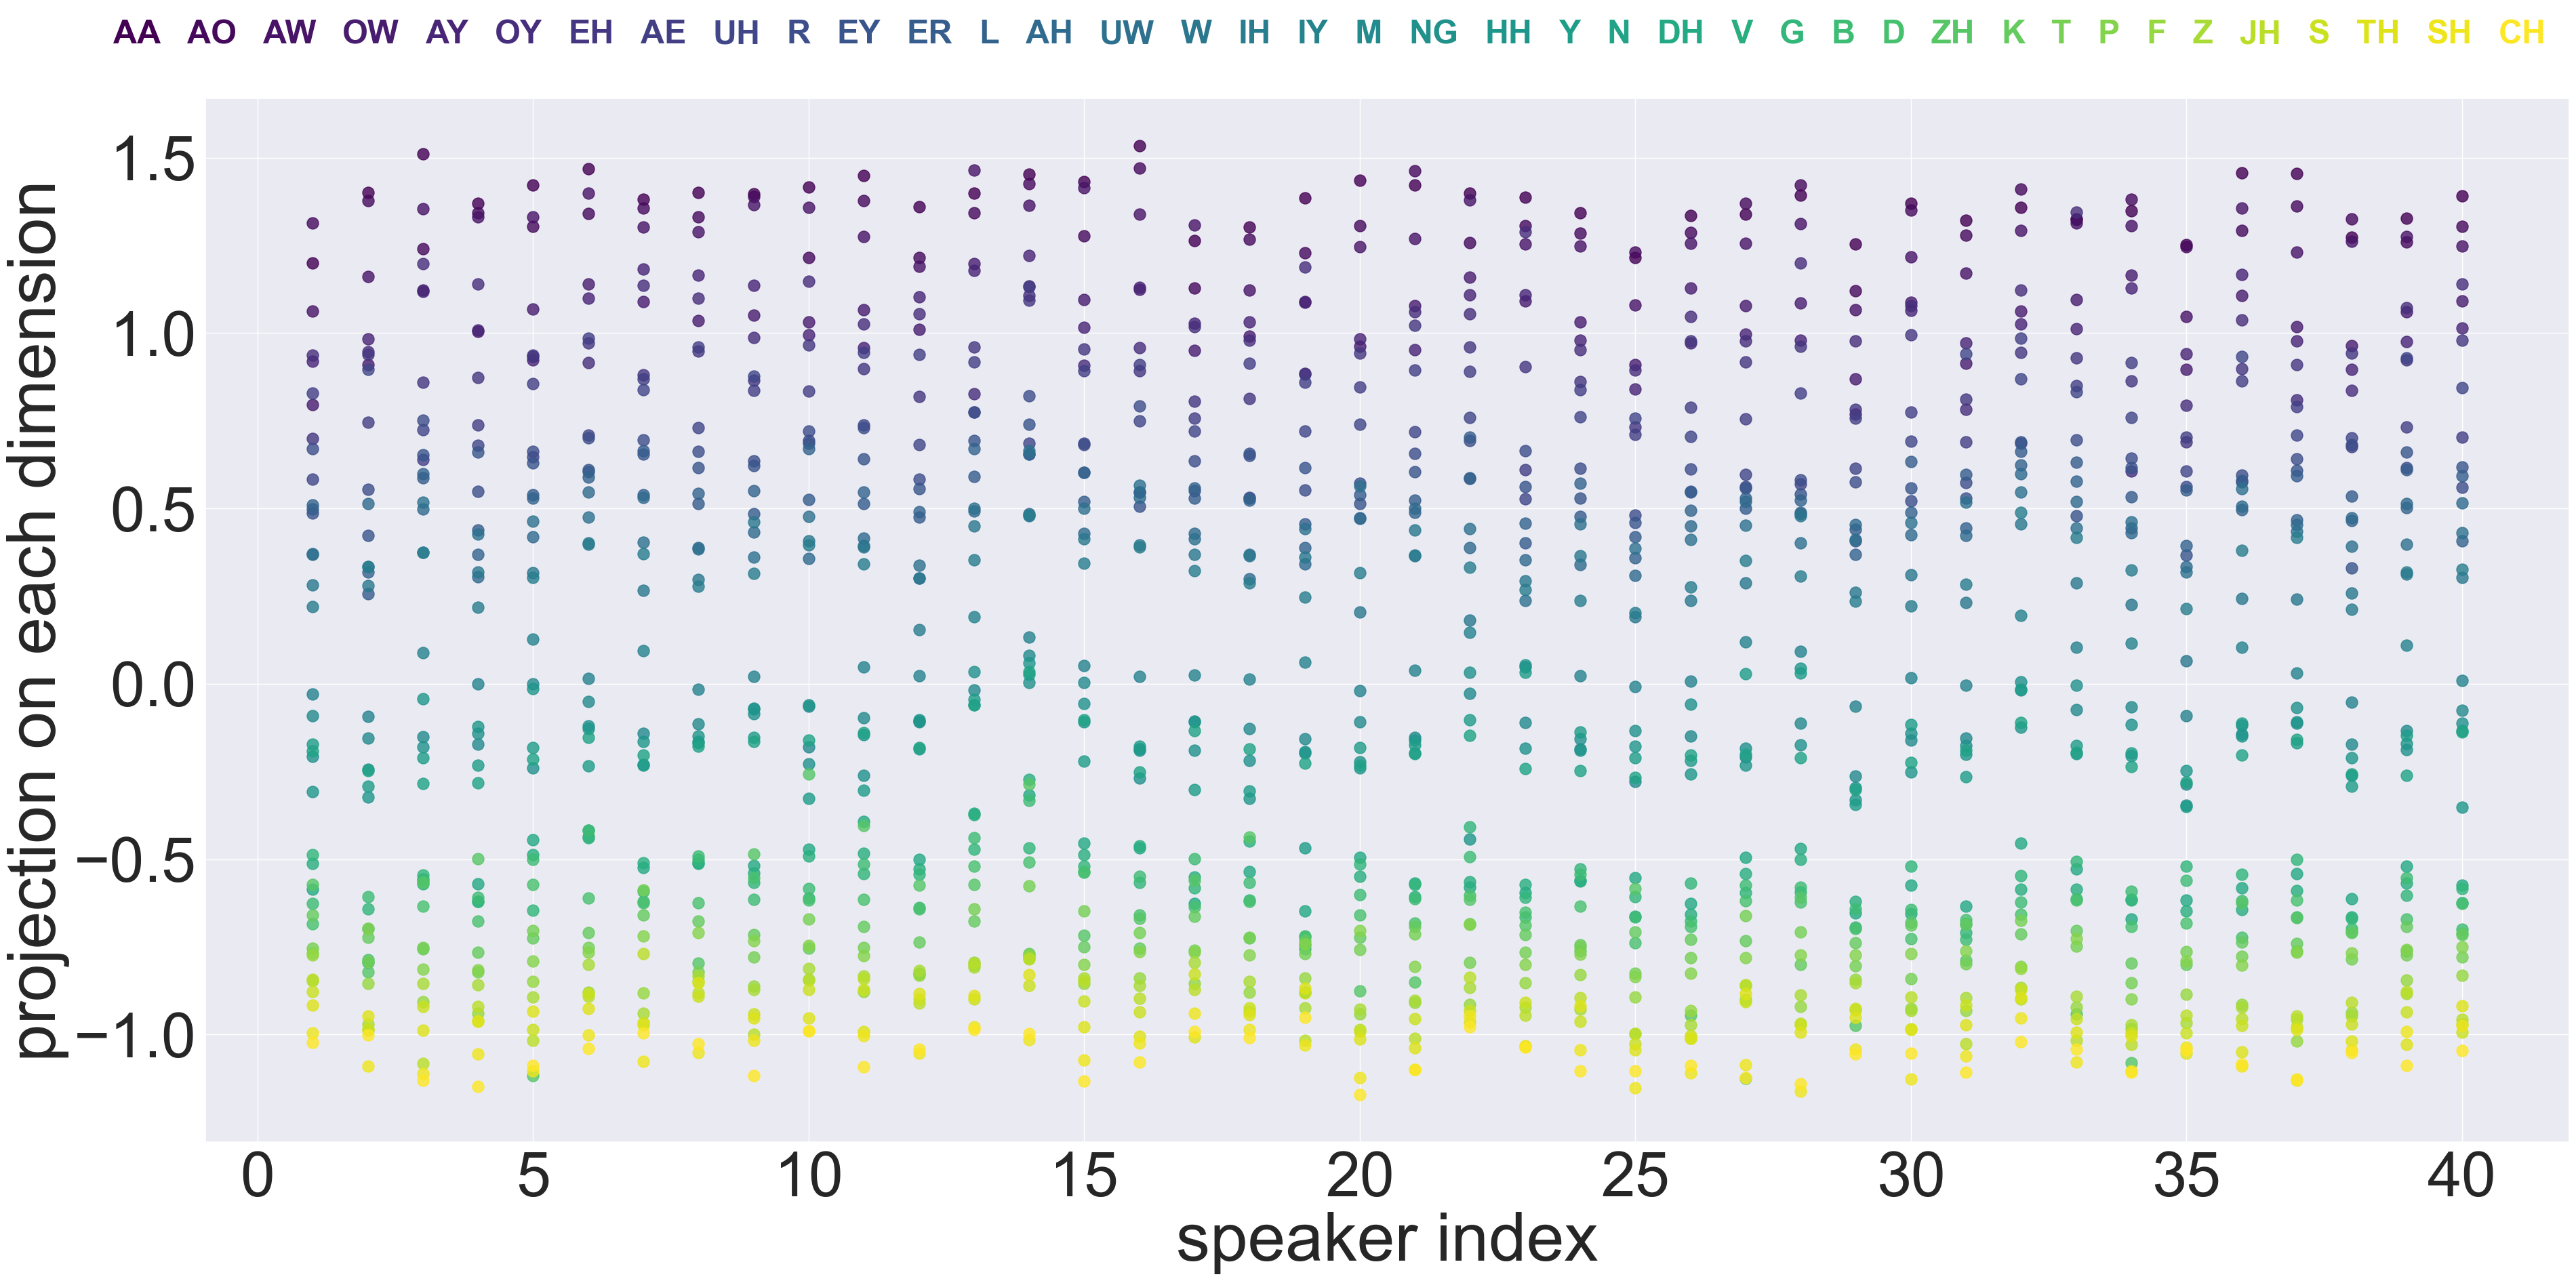

In [8]:
plot_projection_on_dimension(projection, 0)

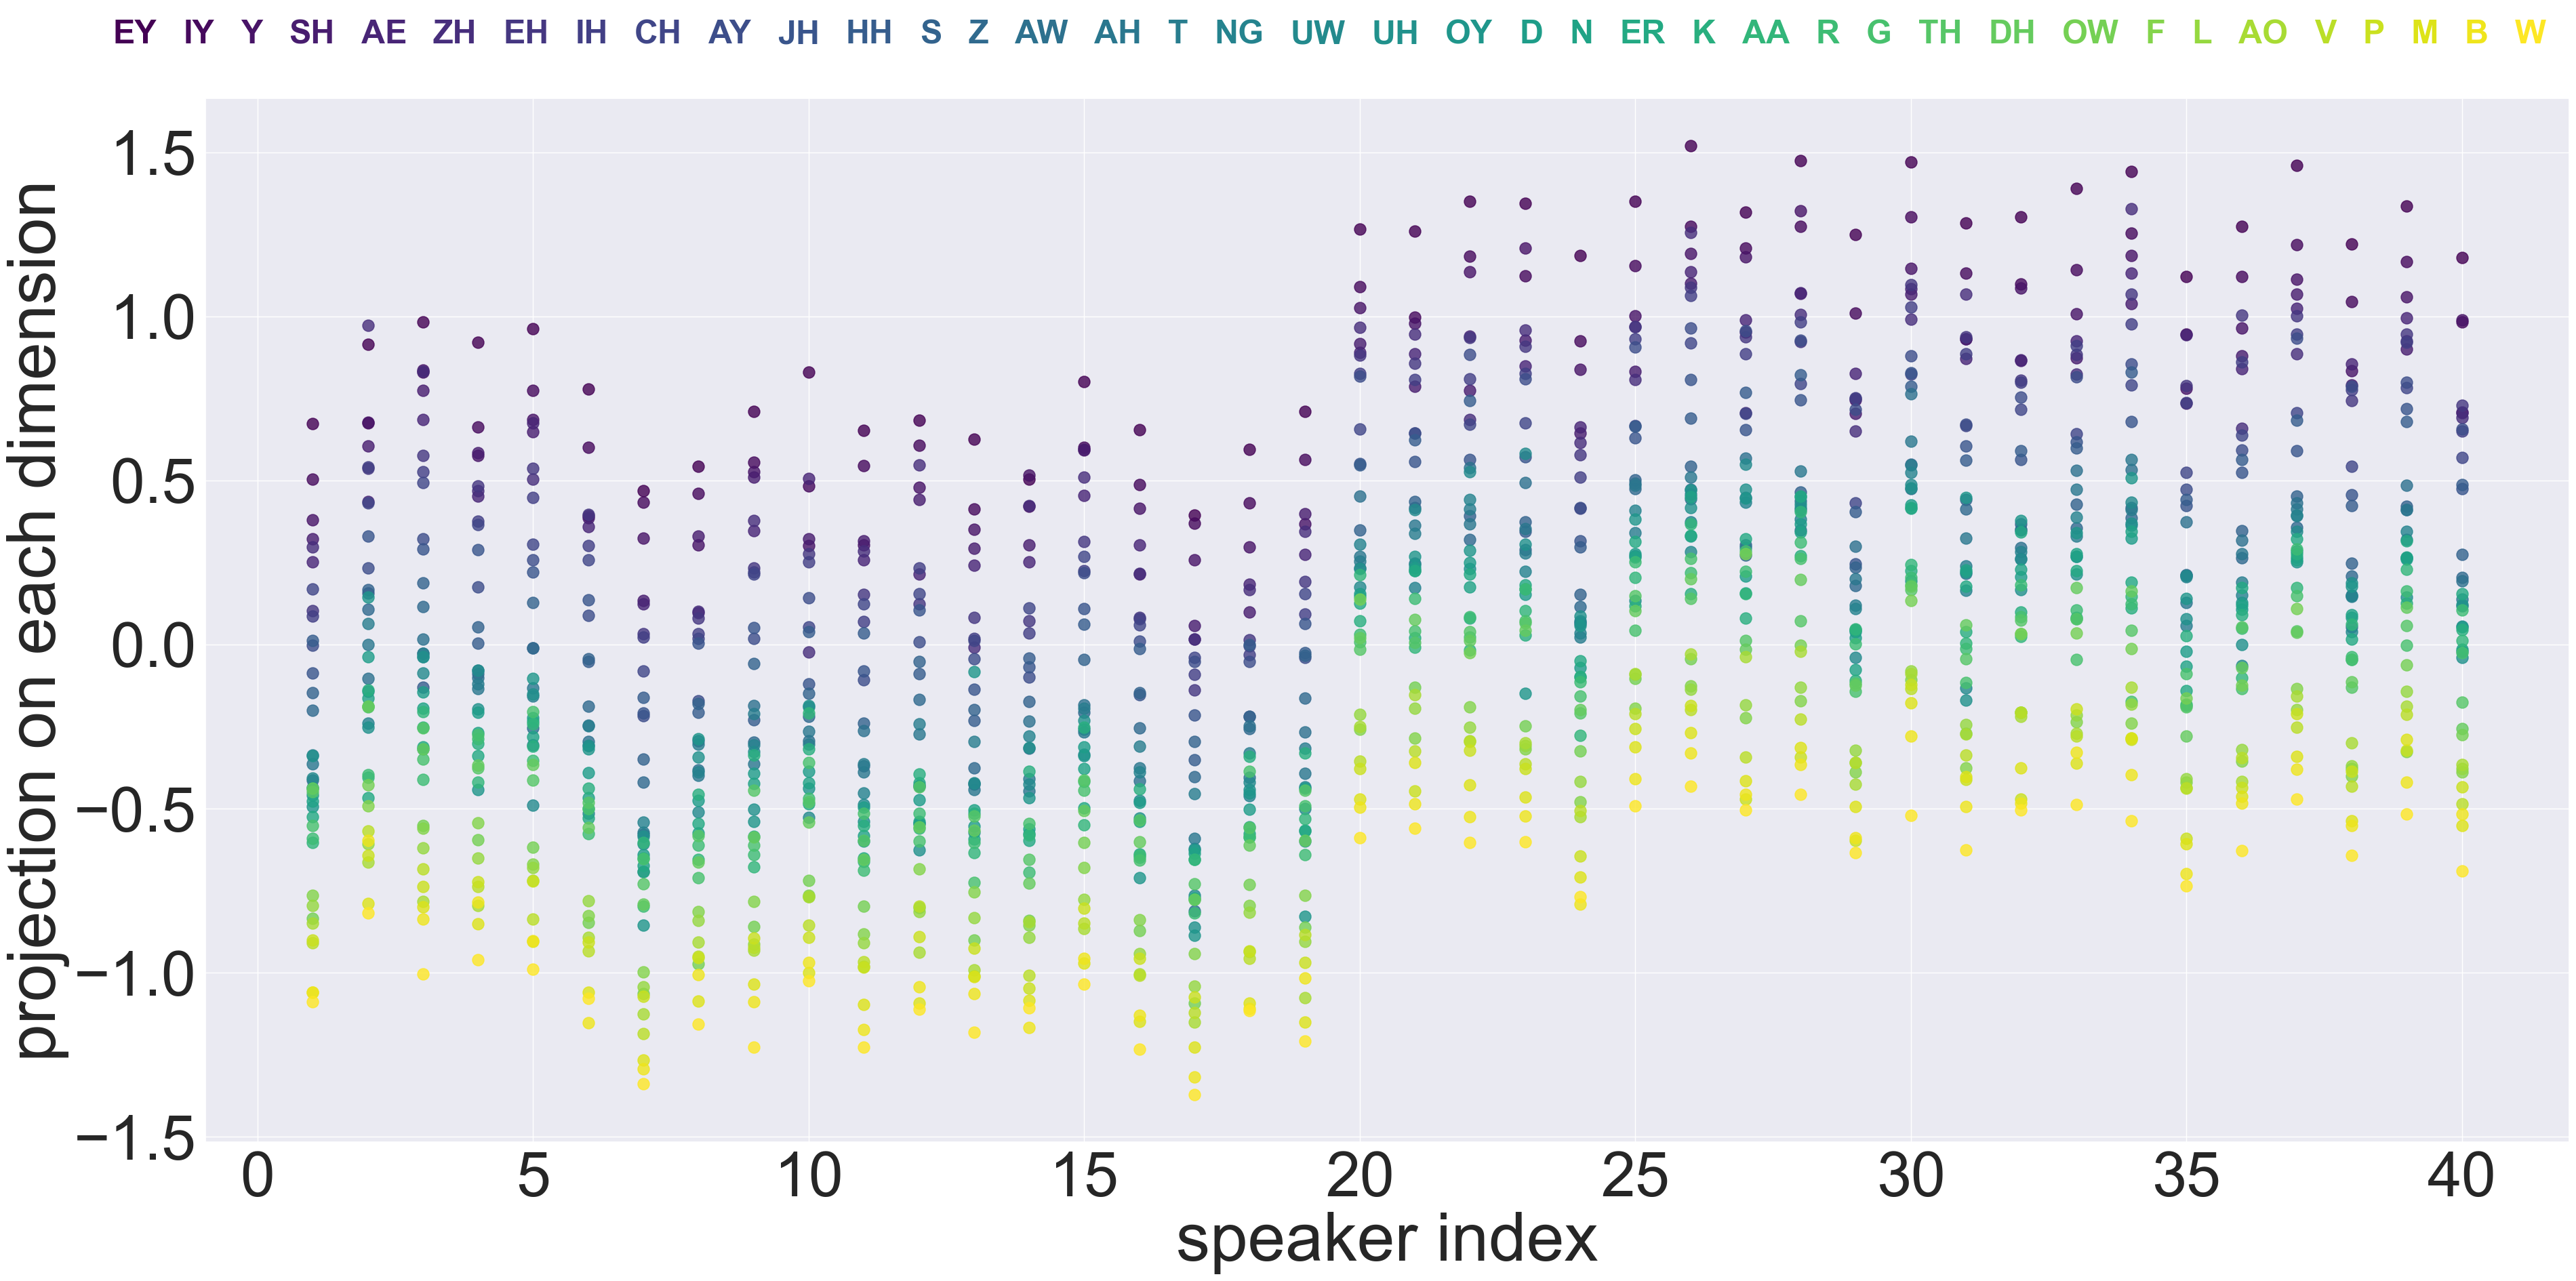

In [9]:
plot_projection_on_dimension(projection, 1)